# Tools - pandas

Mainly based on pandas tutorials:
- from Aurélien Geron in Hands on machine learning v2: https://github.com/ageron/handson-ml2
- Gilles Loupe https://github.com/AI-BlackBelt/yellow/tree/master/notebooks


*The `pandas` library provides high-performance, easy-to-use data structures and data analysis tools. The main data structure is the `DataFrame`, which you can think of as an in-memory 2D table (like a spreadsheet, with column names and row labels). Many features available in Excel are available programmatically, such as creating pivot tables, computing columns based on other columns, plotting graphs, etc. You can also group rows by column value, or join tables much like in SQL. Pandas is also great at handling time series.*

Prerequisites:
* NumPy – if you are not familiar with NumPy, we recommend that you go through the [NumPy tutorial](3_tools_numpy.ipynb) now.

# Summary

## 0. Let's start with a showcase
## 1. Pandas: data analysis in python
## 2. `Series` objects
## 3. `DataFrame` objects
## 4. Handling time
## 5. Saving & loading
## 6. Combining `DataFrame`s -> Bonus
## 7. Handling missing data -> Bonus

---

Let's import `pandas`. People usually import it as `pd`:

In [13]:
import pandas as pd

# 0. Let's start with a showcase -> Gilles Loupe tutorial

## 0.1 Case 1: titanic survival data

In [ ]:
df = pd.read_csv("data/titanic.csv")

In [ ]:
df.head()

Starting from reading this dataset, to answering questions about this data in a few lines of code:

**What is the age distribution of the passengers?**

In [ ]:
df['Age'].hist().plot()

**How does the survival rate of the passengers differ between sexes?**

In [ ]:
df.groupby('Sex')[['Survived']].aggregate(lambda x: x.sum() / len(x))

**Or how does it differ between the different classes?**

In [ ]:
df.groupby('Pclass')['Survived'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

All the needed functionality for the above examples will be explained throughout this tutorial.

## 0.2 Case 2: air quality measurement timeseries

AirBase (The European Air quality dataBase): hourly measurements of all air quality monitoring stations from Europe

Starting from these hourly data for different stations:

In [14]:
data = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)

In [15]:
data.head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
2000-01-01 05:00:00,79.0,52.0,64.0,28.0


to answering questions about this data in a few lines of code:

**Does the air pollution show a decreasing trend over the years?**

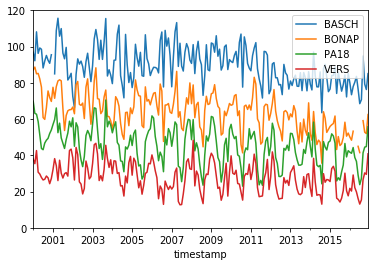

In [16]:
data['1999':].resample('M').mean().plot(ylim=[0,120])

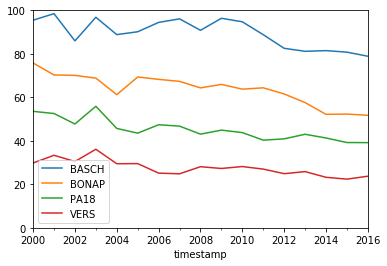

In [17]:
data['1999':].resample('A').mean().plot(ylim=[0,100])

**What is the difference in diurnal profile between weekdays and weekend?**

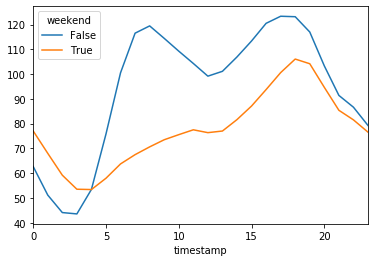

In [18]:
data['weekday'] = data.index.weekday
data['weekend'] = data['weekday'].isin([5, 6])
data_weekend = data.groupby(['weekend', data.index.hour])['BASCH'].mean().unstack(level=0)
data_weekend.plot()

# 1. Pandas: data analysis in python

For data-intensive work in Python the [Pandas](http://pandas.pydata.org) library has become essential.

What is `pandas`?

* Pandas can be thought of as *NumPy arrays with labels* for rows and columns, and better support for heterogeneous data types, but it's also much, much more than that.
* Pandas can also be thought of as `R`'s `data.frame` in Python.
* Powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

It's documentation: http://pandas.pydata.org/pandas-docs/stable/


** When do you need pandas? **

When working with **tabular or structured data** (like R dataframe, SQL table, Excel spreadsheet, ...):

- Import data
- Clean up messy data
- Explore data, gain insight into data
- Process and prepare your data for analysis
- Analyse your data (together with scikit-learn, statsmodels, ...)

<div class="alert alert-warning">
<b>ATTENTION!</b>: <br>

Pandas is great for working with heterogeneous and tabular 1D/2D data, but not all types of data fit in such structures!
<ul>
<li>When working with array data (e.g. images, numerical algorithms): just stick with numpy</li>
<li>When working with multidimensional labeled data (e.g. climate data): have a look at [xarray](http://xarray.pydata.org/en/stable/)</li>
</ul>
</div>

# 2. `Series` objects
The `pandas` library contains these useful data structures:
* `Series` objects, that we will discuss now. A `Series` object is 1D array, similar to a column in a spreadsheet (with a column name and row labels).
* `DataFrame` objects. This is a 2D table, similar to a spreadsheet (with column names and row labels).

## 2.1 Creating a `Series`
Let's start by creating our first `Series` object!

In [ ]:
s = pd.Series([2,-1,3,5])
s

## 2.2 Similarities to a 1D `ndarray`
`Series` objects behave much like one-dimensional NumPy `ndarray`s, and you can often pass them as parameters to NumPy functions:

In [ ]:
import numpy as np
np.exp(s)

Arithmetic operations on `Series` are also possible, and they apply *elementwise*, just like for `ndarray`s:

In [ ]:
s + [1000,2000,3000,4000]

Similar to NumPy, if you add a single number to a `Series`, that number is added to all items in the `Series`. This is called * broadcasting*:

In [ ]:
s + 1000

The same is true for all binary operations such as `*` or `/`, and even conditional operations:

In [ ]:
s < 0

## 2.3 Index labels
Each item in a `Series` object has a unique identifier called the *index label*. By default, it is simply the rank of the item in the `Series` (starting at `0`) but you can also set the index labels manually:

In [ ]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

You can then use the `Series` just like a `dict`:

In [ ]:
s2["bob"]

You can still access the items by integer location, like in a regular array:

In [ ]:
s2[1]

To make it clear when you are accessing by label or by integer location, it is recommended to always use the `loc` attribute when accessing by label, and the `iloc` attribute when accessing by integer location:

In [ ]:
s2.loc["bob"]

In [ ]:
s2.iloc[1]

Slicing a `Series` also slices the index labels:

In [ ]:
s2.iloc[1:3]


## 2.4 Init from `dict`
You can create a `Series` object from a `dict`. The keys will be used as index labels:

In [ ]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

You can control which elements you want to include in the `Series` and in what order by explicitly specifying the desired `index`:

In [ ]:
s4 = pd.Series(weights, index = ["colin", "alice"])
s4

## 2.5 Init with a scalar
You can also initialize a `Series` object using a scalar and a list of index labels: all items will be set to the scalar.

In [ ]:
meaning = pd.Series(42, ["life", "universe", "everything"])
meaning

## 2.6 Plotting a `Series`
Pandas makes it easy to plot `Series` data using matplotlib (for more details on matplotlib, check out the [matplotlib tutorial](tools_matplotlib.ipynb)). Just import matplotlib and call the `plot()` method:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

There are *many* options for plotting your data. It is not necessary to list them all here: if you need a particular type of plot (histograms, pie charts, etc.), just look for it in the excellent [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html) section of pandas' documentation, and look at the example code.

## 2.7 EXERCISES `Series`

<div class="alert alert-success">

<b>EXERCISES</b>:

 <ul>
  <li>Write a Python program to convert a NumPy array to a Pandas series.</li>
  <li>Write a Pandas program to convert a given Series to an array.</li>
  <li>Write a Pandas program to convert Series of lists to one Series.</li>
  <li>Write a Pandas program to add some data to an existing Series. </li>
  <li>Write a Pandas program to create the mean and standard deviation of the data of a given Series.</li>
</ul>
</div>


In [ ]:
np_array = np.array([10, 20, 30, 40, 50])
print("NumPy array:")
print(np_array)

In [ ]:
s1 = pd.Series(['100', '200', 'python', '300.12', '400'])
print("Original Data Series:")
print(s1)

In [ ]:
s = pd.Series([
    ['Red', 'Green', 'White'],
    ['Red', 'Black'],
    ['Yellow']])
print("Original Series of list")
print(s)

In [ ]:
s = pd.Series(['100', '200', 'python', '300.12', '400'])
print("Original Data Series:")
print(s)

In [ ]:
s = pd.Series(data = [1,2,3,4,5,6,7,8,9,5,3])
print("Original Data Series:")
print(s)

# 3. `DataFrame` objects
A DataFrame object represents a spreadsheet, with cell values, column names and row index labels. You can define expressions to compute columns based on other columns, create pivot-tables, group rows, draw graphs, etc. You can see `DataFrame`s as dictionaries of `Series`.

## 3.1 Creating a `DataFrame`
You can create a DataFrame by passing a dictionary of `Series` objects:

In [ ]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

A few things to note:
* the `Series` were automatically aligned based on their index,
* missing values are represented as `NaN`,
* `Series` names are ignored (the name `"year"` was dropped),
* `DataFrame`s are displayed nicely in Jupyter notebooks, woohoo!

You can access columns pretty much as you would expect. They are returned as `Series` objects:

In [ ]:
people["birthyear"]

You can also get multiple columns at once:

In [ ]:
people[["birthyear", "hobby"]]

If you pass a list of columns and/or index row labels to the `DataFrame` constructor, it will guarantee that these columns and/or rows will exist, in that order, and no other column/row will exist. For example:

In [ ]:
d2 = pd.DataFrame(
        people_dict,
        columns=["birthyear", "weight", "height"],
        index=["bob", "alice", "eugene"]
     )
d2

Another convenient way to create a `DataFrame` is to pass all the values to the constructor as an `ndarray`, or a list of lists, and specify the column names and row index labels separately:

In [ ]:
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

To specify missing values, you can either use `np.nan` or NumPy's masked arrays:

In [ ]:
masked_array = np.ma.asarray(values, dtype=np.object)
masked_array[(0, 2), (1, 2)] = np.ma.masked
d3 = pd.DataFrame(
        masked_array,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

Instead of an `ndarray`, you can also pass a `DataFrame` object:

In [ ]:
d4 = pd.DataFrame(
         d3,
         columns=["hobby", "children"],
         index=["alice", "bob"]
     )
d4

It is also possible to create a `DataFrame` with a dictionary (or list) of dictionaries (or list):

In [ ]:
people = pd.DataFrame({
    "birthyear": {"alice":1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice":"Biking", "bob": "Dancing"},
    "weight": {"alice":68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people



## 3.1 EXERCISES Creating a `DataFrame`

<div class="alert alert-success">

<b>EXERCISE</b>:

Write a Pandas program to create and display a DataFrame from a specified dictionary data which has the index labels.

</div>

In [ ]:
exam_data  = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
        'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
        'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

## 3.2 Overview functions
When dealing with large `DataFrames`, it is useful to get a quick overview of its content. Pandas offers a few functions for this. First, let's create a large `DataFrame` with a mix of numeric values, missing values and text values. Notice how Jupyter displays only the corners of the `DataFrame`:

In [ ]:
much_data = np.fromfunction(lambda x,y: (x+y*y)%17*11, (10000, 26))
large_df = pd.DataFrame(much_data, columns=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
large_df[large_df % 16 == 0] = np.nan
large_df.insert(3,"some_text", "Blabla")
large_df

The `head()` method returns the top 5 rows:

In [ ]:
large_df.head()

Of course there's also a `tail()` function to view the bottom 5 rows. You can pass the number of rows you want:

In [ ]:
large_df.tail(n=2)

The `info()` method prints out a summary of each columns contents:

In [ ]:
large_df.info()

Finally, the `describe()` method gives a nice overview of the main aggregated values over each column:
* `count`: number of non-null (not NaN) values
* `mean`: mean of non-null values
* `std`: [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of non-null values
* `min`: minimum of non-null values
* `25%`, `50%`, `75%`: 25th, 50th and 75th [percentile](https://en.wikipedia.org/wiki/Percentile) of non-null values
* `max`: maximum of non-null values

In [ ]:
large_df.describe()


## 3.2 EXERCISES overview of DataFrame

<div class="alert alert-success">

<b>EXERCISE</b>:

<ul>
  <li>Write a Pandas program to display the first 10 rows of the titanic DataFrame.</li>
  <li>Write a Pandas program to get the details of the columns PassengerId and Survived of the DataFrame.</li>
</ul>


</div>


In [ ]:
df = pd.read_csv('data/titanic.csv')
# ...

## 3.3 Accessing rows
Let's go back to the `people` `DataFrame`:

In [ ]:
people

The `loc` attribute lets you access rows instead of columns. The result is a `Series` object in which the `DataFrame`'s column names are mapped to row index labels:

In [ ]:
people.loc["charles"]

You can also access rows by integer location using the `iloc` attribute:

In [ ]:
people.iloc[2]

You can also get a slice of rows, and this returns a `DataFrame` object:

In [ ]:
people.iloc[1:3]

Finally, you can pass a boolean array to get the matching rows:

In [ ]:
people[np.array([True, False, True])]

This is most useful when combined with boolean expressions:

In [ ]:
people[people["birthyear"] < 1990]

## 3.3 EXERCISES Accessing rows

<div class="alert alert-success">

<b>EXERCISE</b>:

Write a Pandas program to change the score in row 'd' to 11.5.

</div>


In [ ]:
exam_data  = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
        'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
        'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']



## 3.4 Adding and removing columns
You can generally treat `DataFrame` objects like dictionaries of `Series`, so the following work fine:

In [ ]:
people

In [ ]:
people["age"] = 2018 - people["birthyear"]  # adds a new column "age"
people["over 30"] = people["age"] > 30      # adds another column "over 30"
birthyears = people.pop("birthyear")
del people["children"]

people

In [ ]:
birthyears

When you add a new colum, it must have the same number of rows. Missing rows are filled with NaN, and extra rows are ignored:

In [ ]:
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene":1})  # alice is missing, eugene is ignored
people

When adding a new column, it is added at the end (on the right) by default. You can also insert a column anywhere else using the `insert()` method:

In [ ]:
people.insert(1, "height", [172, 181, 185])
people

## 3.5 Evaluating an expression
A great feature supported by pandas is expression evaluation. This relies on the `numexpr` library which must be installed.

In [ ]:
people.eval("weight / (height/100) ** 2 > 25")

Assignment expressions are also supported. Let's set `inplace=True` to directly modify the `DataFrame` rather than getting a modified copy:

In [ ]:
people.eval("body_mass_index = weight / (height/100) ** 2", inplace=True)
people

You can use a local or global variable in an expression by prefixing it with `'@'`:

In [ ]:
overweight_threshold = 30
people.eval("overweight = body_mass_index > @overweight_threshold", inplace=True)
people

## 3.6 Querying a `DataFrame`
The `query()` method lets you filter a `DataFrame` based on a query expression:

In [ ]:
people.query("age > 30 and pets == 0")

## 3.6 EXERCISES Querying a `DataFrame`

<div class="alert alert-success">

<b>EXERCISE</b>:

Write a Pandas program to select the rows where number of attempts in the examination is less than 2 and score greater than 15.

</div>


In [ ]:
exam_data  = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
        'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
        'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

## 3.7 Sorting a `DataFrame`
You can sort a `DataFrame` by calling its `sort_index` method. By default it sorts the rows by their index label, in ascending order, but let's reverse the order:

In [ ]:
people.sort_index(ascending=False)

Note that `sort_index` returned a sorted *copy* of the `DataFrame`. To modify `people` directly, we can set the `inplace` argument to `True`. Also, we can sort the columns instead of the rows by setting `axis=1`:

In [ ]:
people.sort_index(axis=1, inplace=True)
people

To sort the `DataFrame` by the values instead of the labels, we can use `sort_values` and specify the column to sort by:

In [ ]:
people.sort_values(by="age", inplace=True)
people

## 3.7 EXERCISES Sorting a `DataFrame`

<div class="alert alert-success">

<b>EXERCISE</b>:

Write a Pandas program to sort the data frame first by 'name' in descending order, then by 'score' in ascending order.
</div>


In [ ]:
exam_data  = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
        'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
        'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

## 3.8 Plotting a `DataFrame`
Just like for `Series`, pandas makes it easy to draw nice graphs based on a `DataFrame`.

For example, it is trivial to create a line plot from a `DataFrame`'s data by calling its `plot` method:

In [ ]:
people.plot(kind = "line", x = "body_mass_index", y = ["height", "weight"])
plt.show()

You can pass extra arguments supported by matplotlib's functions. For example, we can create scatterplot and pass it a list of sizes using the `s` argument of matplotlib's `scatter()` function:

In [ ]:
people.plot(kind = "scatter", x = "height", y = "weight", s=[40, 120, 200])
plt.show()

Again, there are way too many options to list here: the best option is to scroll through the [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html) page in pandas' documentation, find the plot you are interested in and look at the example code.

## 3.9 Operations on `DataFrame`s
Although `DataFrame`s do not try to mimick NumPy arrays, there are a few similarities. Let's create a `DataFrame` to demonstrate this:

In [ ]:
grades_array = np.array([[8,8,9],[10,9,9],[4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index=["alice","bob","charles","darwin"])
grades

You can apply NumPy mathematical functions on a `DataFrame`: the function is applied to all values:

In [ ]:
np.sqrt(grades)

Similarly, adding a single value to a `DataFrame` will add that value to all elements in the `DataFrame`. This is called *broadcasting*:

In [ ]:
grades + 1

Of course, the same is true for all other binary operations, including arithmetic (`*`,`/`,`**`...) and conditional (`>`, `==`...) operations:

In [ ]:
grades >= 5

Aggregation operations, such as computing the `max`, the `sum` or the `mean` of a `DataFrame`, apply to each column, and you get back a `Series` object:

In [ ]:
grades.mean()

The `all` method is also an aggregation operation: it checks whether all values are `True` or not. Let's see during which months all students got a grade greater than `5`:

In [ ]:
(grades > 5).all()

Most of these functions take an optional `axis` parameter which lets you specify along which axis of the `DataFrame` you want the operation executed. The default is `axis=0`, meaning that the operation is executed vertically (on each column). You can set `axis=1` to execute the operation horizontally (on each row). For example, let's find out which students had all grades greater than `5`:

In [ ]:
(grades > 5).all(axis = 1)

The `any` method returns `True` if any value is True. Let's see who got at least one grade 10:

In [ ]:
(grades == 10).any(axis = 1)

If you add a `Series` object to a `DataFrame` (or execute any other binary operation), pandas attempts to broadcast the operation to all *rows* in the `DataFrame`. This only works if the `Series` has the same size as the `DataFrame`s rows. For example, let's substract the `mean` of the `DataFrame` (a `Series` object) from the `DataFrame`:

In [ ]:
grades - grades.mean()  # equivalent to: grades - [7.75, 8.75, 7.50]

We substracted `7.75` from all September grades, `8.75` from October grades and `7.50` from November grades. It is equivalent to substracting this `DataFrame`:

In [ ]:
pd.DataFrame([[7.75, 8.75, 7.50]]*4, index=grades.index, columns=grades.columns)

If you want to substract the global mean from every grade, here is one way to do it:

In [ ]:
grades - grades.values.mean() # substracts the global mean (8.00) from all grades


## 3.9 EXERCISES Operations on `DataFrame`s

<div class="alert alert-success">

<b>EXERCISE</b>:

Write a Pandas program to calculate the mean score for each different student in data frame.

</div>


In [ ]:
exam_data  = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
        'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
        'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

## 3.10 ADVANCED EXERCISES on `DataFrame`

NO2 dataset.

In [ ]:
no2 = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)


<div class="alert alert-success">

<b>EXERCISE</b>:

The evolution of the yearly averages with, and the overall mean of all stations

</div>

<div class="alert alert-success">

<b>EXERCISE</b>: How does the *typical monthly profile* look like for the different stations?

 <ul>
  <li>Add a 'month' column to the dataframe.</li>
  <li>Group by the month to obtain the typical monthly averages over the different years.</li>
</ul>
</div>

<div class="alert alert-success">

<b>EXERCISE</b>: The typical diurnal profile for the different stations

 <ul>
  <li>Similar as for the month, you can now group by the hour of the day.</li>
</ul>
</div>

<div class="alert alert-success">

<b>EXERCISE</b>: What is the difference in the typical diurnal profile between week and weekend days for the 'BASCH' station.

 <ul>
  <li>Add a column 'weekday' defining the different days in the week.</li>
  <li>Add a column 'weekend' defining if a days is in the weekend (i.e. days 5 and 6) or not (True/False).</li>
  <li>You can groupby on multiple items at the same time. In this case you would need to group by both weekend/weekday and hour of the day.</li>
</ul>
</div>


<div class="alert alert-success">

<b>EXERCISE</b>: What are the number of exceedances of hourly values above the European limit 200 µg/m3 ?

Count the number of exceedances of hourly values above the European limit 200 µg/m3 for each year and station after 2005. Make a barplot of the counts. Add an horizontal line indicating the maximum number of exceedances (which is 18) allowed per year?
<br><br>

Hints:

 <ul>
  <li>Create a new DataFrame, called `exceedances`, (with boolean values) indicating if the threshold is exceeded or not</li>
  <li>Remember that the sum of True values can be used to count elements. Do this using groupby for each year.</li>
  <li>Adding a horizontal line can be done with the matplotlib function `ax.axhline`.</li>
</ul>
</div>


# 4. Handling time
Many datasets have timestamps, and pandas is awesome at manipulating such data:
* it can represent periods (such as 2016Q3) and frequencies (such as "monthly"),
* it can convert periods to actual timestamps, and *vice versa*,
* it can resample data and aggregate values any way you like,
* it can handle timezones.


## 4.1 Introduction: datetime module

Standard Python contains the `datetime` module to handle with date and time data:

In [ ]:
import datetime

In [ ]:
dt = datetime.datetime(year=2016, month=12, day=19, hour=13, minute=30)
dt

In [ ]:
print(dt) # .day,...

In [ ]:
print(dt.strftime("%d %B %Y"))


## 4.2 Dates and times in pandas

## The ``Timestamp`` object

Pandas has its own date and time objects, which are compatible with the standard `datetime` objects, but provide some more functionality to work with.  

The `Timestamp` object can also be constructed from a string:

In [ ]:
ts = pd.Timestamp('2016-12-19')
ts

Like with `datetime.datetime` objects, there are several useful attributes available on the `Timestamp`. For example, we can get the month:

In [ ]:
ts.month

In [ ]:
ts + pd.Timedelta('5 days')

## 4.3 Time range
Let's start by creating a time series using `pd.date_range()`. This returns a `DatetimeIndex` containing one datetime per hour for 12 hours starting on October 29th 2016 at 5:30pm.


In [ ]:
dates = pd.date_range('2016/10/29 5:30pm', periods=12, freq='H')
dates

This `DatetimeIndex` may be used as an index in a `Series`:

In [ ]:
temp_series = pd.Series(temperatures, dates)
temp_series

Let's plot this series:

In [ ]:
temp_series.plot(kind="bar")

plt.grid(True)
plt.show()

## 4.4 Selecting data from a time series

We can use label based indexing on a timeseries as expected:

In [ ]:
data = pd.read_csv("data/flowdata.csv", index_col=0, parse_dates=True)

data[pd.Timestamp("2012-01-01 09:00"):pd.Timestamp("2012-01-01 19:00")]

But, for convenience, indexing a time series also works with strings:

In [ ]:
data["2012-01-01 09:00":"2012-01-01 19:00"]

A nice feature is **"partial string" indexing**, where we can do implicit slicing by providing a partial datetime string.

E.g. all data of 2013:

In [ ]:
data['2013']

Normally you would expect this to access a column named '2013', but as for a DatetimeIndex, pandas also tries to interprete it as a datetime slice.

Or all data of January up to March 2012:

In [ ]:
data['2012-01':'2012-03']


## 4.4 EXERCISES Selecting data from a time series

<div class="alert alert-success">

<b>EXERCISE</b>:

Select all data starting from 2012.
</div>

<div class="alert alert-success">

<b>EXERCISE</b>:

Select all data in January for all different years.
</div>

<div class="alert alert-success">

<b>EXERCISE</b>:

Select all data in January, February and March for all different years.
</div>

<div class="alert alert-success">

<b>EXERCISE</b>:

Select all 'daytime' data (between 8h and 20h) for all days.
</div>

## 4.5 Resampling
Pandas lets us resample a time series very simply. Just call the `resample()` method and specify a new frequency:

In [ ]:
temp_series_freq_2H = temp_series.resample("2H")
temp_series_freq_2H

The resampling operation is actually a deferred operation, which is why we did not get a `Series` object, but a `DatetimeIndexResampler` object instead. To actually perform the resampling operation, we can simply call the `mean()` method: Pandas will compute the mean of every pair of consecutive hours:

In [ ]:
temp_series_freq_2H = temp_series_freq_2H.mean()

Let's plot the result:

In [ ]:
temp_series_freq_2H.plot(kind="bar")
plt.show()

Note how the values have automatically been aggregated into 2-hour periods. If we look at the 6-8pm period, for example, we had a value of `5.1` at 6:30pm, and `6.1` at 7:30pm. After resampling, we just have one value of `5.6`, which is the mean of `5.1` and `6.1`. Rather than computing the mean, we could have used any other aggregation function, for example we can decide to keep the minimum value of each period:

In [ ]:
temp_series_freq_2H = temp_series.resample("2H").min()
temp_series_freq_2H

Or, equivalently, we could use the `apply()` method instead:

In [ ]:
temp_series_freq_2H = temp_series.resample("2H").apply(np.min)
temp_series_freq_2H

## 4.5 EXERCISES Resampling

<div class="alert alert-success">

<b>EXERCISE</b>:

Plot the monthly standard deviation of the columns.
</div>

<div class="alert alert-success">

<b>EXERCISE</b>:

Plot the monthly mean and median values for the years 2011-2012 for 'L06_347'.
    
<b>Note.</b> You can create a new figure with `fig, ax = plt.subplots()` and add each of the plots to the created `ax` object (see documentation of pandas plot function)
</div>


<div class="alert alert-success">

<b>EXERCISE</b>:

Plot the monthly mininum and maximum daily average value of the 'LS06_348' column.
</div>

<div class="alert alert-success">
<b>EXERCISE</b>:

Make a bar plot of the mean of the stations in year of 2013 (Remark: create a `fig, ax = plt.subplots()` object and add the plot to the created ax.

</div>

<div class="alert alert-success">
<b>EXERCISE</b>:

Calculate the typical yearly pattern with monthly resolution (plot of the typical monthly average over the years).

</div>

## 4.6 Upsampling and interpolation
This was an example of downsampling. We can also upsample (ie. increase the frequency), but this creates holes in our data:

In [ ]:
temp_series_freq_15min = temp_series.resample("15Min").mean()
temp_series_freq_15min.head(n=10) # `head` displays the top n values

One solution is to fill the gaps by interpolating. We just call the `interpolate()` method. The default is to use linear interpolation, but we can also select another method, such as cubic interpolation:

In [ ]:
temp_series_freq_15min = temp_series.resample("15Min").interpolate(method="cubic")
temp_series_freq_15min.head(n=10)

In [ ]:
temp_series.plot(label="Period: 1 hour")
temp_series_freq_15min.plot(label="Period: 15 minutes")
plt.legend()
plt.show()


## 4.7 Timezones
By default datetimes are *naive*: they are not aware of timezones, so 2016-10-30 02:30 might mean October 30th 2016 at 2:30am in Paris or in New York. We can make datetimes timezone *aware* by calling the `tz_localize()` method:

In [ ]:
temp_series_ny = temp_series.tz_localize("America/New_York")
temp_series_ny

Note that `-04:00` is now appended to all the datetimes. This means that these datetimes refer to [UTC](https://en.wikipedia.org/wiki/Coordinated_Universal_Time) - 4 hours.

We can convert these datetimes to Paris time like this:

In [ ]:
temp_series_paris = temp_series_ny.tz_convert("Europe/Paris")
temp_series_paris

You may have noticed that the UTC offset changes from `+02:00` to `+01:00`: this is because France switches to winter time at 3am that particular night (time goes back to 2am). Notice that 2:30am occurs twice! Let's go back to a naive representation (if you log some data hourly using local time, without storing the timezone, you might get something like this):

In [ ]:
temp_series_paris_naive = temp_series_paris.tz_localize(None)
temp_series_paris_naive

Now `02:30` is really ambiguous. If we try to localize these naive datetimes to the Paris timezone, we get an error:

In [ ]:
try:
    temp_series_paris_naive.tz_localize("Europe/Paris")
except Exception as e:
    print(type(e))
    print(e)

Fortunately using the `ambiguous` argument we can tell pandas to infer the right DST (Daylight Saving Time) based on the order of the ambiguous timestamps:

In [ ]:
temp_series_paris_naive.tz_localize("Europe/Paris", ambiguous="infer")


Pandas also provides many other time-related functions that we recommend you check out in the [documentation](http://pandas.pydata.org/pandas-docs/stable/timeseries.html). To whet your appetite, here is one way to get the last business day of each month in 2016, at 9am:

In [ ]:
months_2016 = pd.period_range("2016", periods=12, freq="M")
one_day_after_last_days = months_2016.asfreq("D") + 1
last_bdays = one_day_after_last_days.to_timestamp() - pd.tseries.offsets.BDay()
last_bdays.to_period("H") + 9


# 5. Saving & loading
Pandas can save `DataFrame`s to various backends, including file formats such as CSV, Excel, JSON, HTML and HDF5, or to a SQL database. Let's create a `DataFrame` to demonstrate this:

In [ ]:
my_df = pd.DataFrame(
    [["Biking", 68.5, 1985, np.nan], ["Dancing", 83.1, 1984, 3]], 
    columns=["hobby","weight","birthyear","children"],
    index=["alice", "bob"]
)
my_df

## 5.1 Saving
Let's save it to CSV, HTML and JSON:

In [ ]:
my_df.to_csv("my_df.csv")
my_df.to_html("my_df.html")
my_df.to_json("my_df.json")

Done! Let's take a peek at what was saved:

In [ ]:
for filename in ("my_df.csv", "my_df.html", "my_df.json"):
    print("#", filename)
    with open(filename, "rt") as f:
        print(f.read())
        print()


Note that the index is saved as the first column (with no name) in a CSV file, as `<th>` tags in HTML and as keys in JSON.

Saving to other formats works very similarly, but some formats require extra libraries to be installed. For example, saving to Excel requires the openpyxl library:

In [ ]:
try:
    my_df.to_excel("my_df.xlsx", sheet_name='People')
except ImportError as e:
    print(e)

## 5.2 Loading
Now let's load our CSV file back into a `DataFrame`:

In [ ]:
my_df_loaded = pd.read_csv("my_df.csv", index_col=0)
my_df_loaded

As you might guess, there are similar `read_json`, `read_html`, `read_excel` functions as well.  We can also read data straight from the Internet. For example, let's load all U.S. cities from [simplemaps.com](http://simplemaps.com/):

In [ ]:
us_cities = None
try:
    csv_url = "http://simplemaps.com/files/cities.csv"
    us_cities = pd.read_csv(csv_url, index_col=0)
    us_cities = us_cities.head()
except IOError as e:
    print(e)
us_cities

There are more options available, in particular regarding datetime format. Check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/io.html) for more details.

# 6. Combining `DataFrame`s

## 6.1 SQL-like joins
One powerful feature of pandas is it's ability to perform SQL-like joins on `DataFrame`s. Various types of joins are supported: inner joins, left/right outer joins and full joins. To illustrate this, let's start by creating a couple simple `DataFrame`s:

In [ ]:
city_loc = pd.DataFrame(
    [
        ["CA", "San Francisco", 37.781334, -122.416728],
        ["NY", "New York", 40.705649, -74.008344],
        ["FL", "Miami", 25.791100, -80.320733],
        ["OH", "Cleveland", 41.473508, -81.739791],
        ["UT", "Salt Lake City", 40.755851, -111.896657]
    ], columns=["state", "city", "lat", "lng"])
city_loc

In [ ]:
city_pop = pd.DataFrame(
    [
        [808976, "San Francisco", "California"],
        [8363710, "New York", "New-York"],
        [413201, "Miami", "Florida"],
        [2242193, "Houston", "Texas"]
    ], index=[3,4,5,6], columns=["population", "city", "state"])
city_pop

Now let's join these `DataFrame`s using the `merge()` function:

In [ ]:
pd.merge(left=city_loc, right=city_pop, on="city")

Note that both `DataFrame`s have a column named `state`, so in the result they got renamed to `state_x` and `state_y`.

Also, note that Cleveland, Salt Lake City and Houston were dropped because they don't exist in *both* `DataFrame`s. This is the equivalent of a SQL `INNER JOIN`. If you want a `FULL OUTER JOIN`, where no city gets dropped and `NaN` values are added, you must specify `how="outer"`:

In [ ]:
all_cities = pd.merge(left=city_loc, right=city_pop, on="city", how="outer")
all_cities

Of course `LEFT OUTER JOIN` is also available by setting `how="left"`: only the cities present in the left `DataFrame` end up in the result. Similarly, with `how="right"` only cities in the right `DataFrame` appear in the result. For example:

In [ ]:
pd.merge(left=city_loc, right=city_pop, on="city", how="right")

If the key to join on is actually in one (or both) `DataFrame`'s index, you must use `left_index=True` and/or `right_index=True`. If the key column names differ, you must use `left_on` and `right_on`. For example:

In [ ]:
city_pop2 = city_pop.copy()
city_pop2.columns = ["population", "name", "state"]
pd.merge(left=city_loc, right=city_pop2, left_on="city", right_on="name")

## 6.2 Concatenation
Rather than joining `DataFrame`s, we may just want to concatenate them. That's what `concat()` is for:

In [ ]:
result_concat = pd.concat([city_loc, city_pop], sort=True)
result_concat

Note that this operation aligned the data horizontally (by columns) but not vertically (by rows). In this example, we end up with multiple rows having the same index (eg. 3). Pandas handles this rather gracefully:

In [ ]:
result_concat.loc[3]

Or you can tell pandas to just ignore the index:

In [ ]:
pd.concat([city_loc, city_pop], ignore_index=True, sort=True)

Notice that when a column does not exist in a `DataFrame`, it acts as if it was filled with `NaN` values. If we set `join="inner"`, then only columns that exist in *both* `DataFrame`s are returned:

In [ ]:
pd.concat([city_loc, city_pop], join="inner", sort=True)

You can concatenate `DataFrame`s horizontally instead of vertically by setting `axis=1`:

In [ ]:
pd.concat([city_loc, city_pop], axis=1, sort=True)

In this case it really does not make much sense because the indices do not align well (eg. Cleveland and San Francisco end up on the same row, because they shared the index label `3`). So let's reindex the `DataFrame`s by city name before concatenating:

In [ ]:
pd.concat([city_loc.set_index("city"), city_pop.set_index("city")], axis=1, sort=True)

This looks a lot like a `FULL OUTER JOIN`, except that the `state` columns were not renamed to `state_x` and `state_y`, and the `city` column is now the index.

The `append()` method is a useful shorthand for concatenating `DataFrame`s vertically:

In [ ]:
city_loc.append(city_pop)

As always in pandas, the `append()` method does *not* actually modify `city_loc`: it works on a copy and returns the modified copy.

# 7. Handling missing data

Dealing with missing data is a frequent task when working with real life data. Pandas offers a few tools to handle missing data.
 

Let's create a `DataFrame` with bonus points for each person from October to December:

In [ ]:
bonus_array = np.array([[0,np.nan,2],[np.nan,1,0],[0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=["oct", "nov", "dec"], index=["bob","colin", "darwin", "charles"])
bonus_points

In [ ]:
grades + bonus_points

Let's try to fix the problem above. For example, we can decide that missing data should result in a zero, instead of `NaN`. We can replace all `NaN` values by a any value using the `fillna()` method:

In [ ]:
(grades + bonus_points).fillna(0)

It's a bit unfair that we're setting grades to zero in September, though. Perhaps we should decide that missing grades are missing grades, but missing bonus points should be replaced by zeros:

In [ ]:
fixed_bonus_points = bonus_points.fillna(0)
fixed_bonus_points.insert(0, "sep", 0)
fixed_bonus_points.loc["alice"] = 0
grades + fixed_bonus_points

That's much better: although we made up some data, we have not been too unfair.

Another way to handle missing data is to interpolate. Let's look at the `bonus_points` `DataFrame` again:

In [ ]:
bonus_points

Now let's call the `interpolate` method. By default, it interpolates vertically (`axis=0`), so let's tell it to interpolate horizontally (`axis=1`).

In [ ]:
bonus_points.interpolate(axis=1)

Bob had 0 bonus points in October, and 2 in December. When we interpolate for November, we get the mean: 1 bonus point. Colin had 1 bonus point in November, but we do not know how many bonus points he had in September, so we cannot interpolate, this is why there is still a missing value in October after interpolation. To fix this, we can set the September bonus points to 0 before interpolation.

In [ ]:
better_bonus_points = bonus_points.copy()
better_bonus_points.insert(0, "sep", 0)
better_bonus_points.loc["alice"] = 0
better_bonus_points = better_bonus_points.interpolate(axis=1)
better_bonus_points

Great, now we have reasonable bonus points everywhere. Let's find out the final grades:

In [ ]:
grades + better_bonus_points

It is slightly annoying that the September column ends up on the right. This is because the `DataFrame`s we are adding do not have the exact same columns (the `grades` `DataFrame` is missing the `"dec"` column), so to make things predictable, pandas orders the final columns alphabetically. To fix this, we can simply add the missing column before adding:

In [ ]:
grades["dec"] = np.nan
final_grades = grades + better_bonus_points
final_grades

There's not much we can do about December and Colin: it's bad enough that we are making up bonus points, but we can't reasonably make up grades (well I guess some teachers probably do). So let's call the `dropna()` method to get rid of rows that are full of `NaN`s:

In [ ]:
final_grades_clean = final_grades.dropna(how="all")
final_grades_clean

Now let's remove columns that are full of `NaN`s by setting the `axis` argument to `1`:

In [ ]:
final_grades_clean = final_grades_clean.dropna(axis=1, how="all")
final_grades_clean


# What next?
As you probably noticed by now, pandas is quite a large library with *many* features. 
Although we went through the most important features, there is still a lot to discover. 
Probably the best way to learn more is to get your hands dirty with some real-life data. 
It is also a good idea to go through pandas' excellent [documentation](http://pandas.pydata.org/pandas-docs/stable/index.html), in particular the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html).


## What we didn't talk about...

- Reshaping data: `pivot_table`, `melt`, `stack`, `unstack`
- ...


## Further reading

* Pandas documentation: http://pandas.pydata.org/pandas-docs/stable/

* Books

    * "Python for Data Analysis" by Wes McKinney
    * "Python Data Science Handbook" by Jake VanderPlas

* Tutorials (many good online tutorials!)

  * https://github.com/jorisvandenbossche/pandas-tutorial
  * https://github.com/brandon-rhodes/pycon-pandas-tutorial

* Tom Augspurger's blog

  * https://tomaugspurger.github.io/modern-1.html